In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
result_df_test_bs_final = pd.read_csv('/content/drive/MyDrive/making-api/result_df_test_bs_final.csv')

In [5]:
result_df_test_cf_final = pd.read_csv('/content/drive/MyDrive/making-api/result_df_test_cf_final.csv')

In [6]:
result_df_test_fs_final = pd.read_csv('/content/drive/MyDrive/making-api/result_df_test_fs_final.csv')

In [29]:
result_df_test_bs_final['Unnamed: 0'][:71] # 70 Total Debt / Total Assets  , Payables

0                               Treasury Shares Number
1                               Ordinary Shares Number
2                                         Share Issued
3                                           Total Debt
4                                  Tangible Book Value
                            ...                       
66                                    Taxes Receivable
67                                    Loans Receivable
68                                 Accounts Receivable
69    Cash Cash Equivalents And Short Term Investments
70                           Cash And Cash Equivalents
Name: Unnamed: 0, Length: 71, dtype: object

In [48]:
df = pd.DataFrame(result_df_test_bs_final)
col_bs = df.set_index(keys=['Unnamed: 0'])

In [54]:
total_debt = col_bs.loc['Total Debt']
total_debt

,2019,2020,2021,2022,2023,Company
Unnamed: 0,,,,,,
Total Debt,25547017.0,47778952.0,40717267.0,36449192.0,NaN,AACG
Total Debt,NaN,NaN,NaN,251754.0,NaN,AACI
Total Debt,NaN,NaN,NaN,251754.0,NaN,AACIU
Total Debt,NaN,NaN,NaN,251754.0,NaN,AACIW
Total Debt,NaN,10256000.0,605000.0,1661000.0,NaN,AADI
...,...,...,...,...,...,...
Total Debt,79528000.0,70353000.0,1588000.0,14123000.0,NaN,ZVRA
Total Debt,NaN,3817156.0,9151508.0,108756.0,NaN,ZVSA
Total Debt,6927000.0,8644000.0,32333000.0,28113000.0,NaN,ZYME


In [114]:
total_asset = col_bs.loc['Total Assets']
total_asset

,2019,2020,2021,2022,2023,Company
Unnamed: 0,,,,,,
Total Assets,667654163.0,575621032.0,507175310.0,474464769.0,NaN,AACG
Total Assets,NaN,NaN,151119504.0,151084445.0,NaN,AACI
Total Assets,NaN,NaN,151119504.0,151084445.0,NaN,AACIU
Total Assets,NaN,NaN,151119504.0,151084445.0,NaN,AACIW
Total Assets,NaN,18825000.0,157910000.0,184237000.0,NaN,AADI
...,...,...,...,...,...,...
Total Assets,10507000.0,11209000.0,132941000.0,115529000.0,NaN,ZVRA
Total Assets,NaN,685567.0,1126174.0,118506271.0,NaN,ZVSA
Total Assets,368205000.0,538376000.0,389132000.0,648725000.0,NaN,ZYME


In [119]:
xy = pd.merge(total_debt, total_asset, on = 'Company', how = 'left')

In [123]:
xy # debt / asset

,2019_x,2020_x,2021_x,2022_x,2023_x,Company,2019_y,2020_y,2021_y,2022_y,2023_y
0,25547017.0,47778952.0,40717267.0,36449192.0,NaN,AACG,667654163.0,575621032.0,507175310.0,474464769.0,NaN
1,NaN,NaN,NaN,251754.0,NaN,AACI,NaN,NaN,151119504.0,151084445.0,NaN
2,NaN,NaN,NaN,251754.0,NaN,AACIU,NaN,NaN,151119504.0,151084445.0,NaN
3,NaN,NaN,NaN,251754.0,NaN,AACIW,NaN,NaN,151119504.0,151084445.0,NaN
4,NaN,10256000.0,605000.0,1661000.0,NaN,AADI,NaN,18825000.0,157910000.0,184237000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4092,79528000.0,70353000.0,1588000.0,14123000.0,NaN,ZVRA,10507000.0,11209000.0,132941000.0,115529000.0,NaN
4093,NaN,3817156.0,9151508.0,108756.0,NaN,ZVSA,NaN,685567.0,1126174.0,118506271.0,NaN
4094,6927000.0,8644000.0,32333000.0,28113000.0,NaN,ZYME,368205000.0,538376000.0,389132000.0,648725000.0,NaN
4095,353366.0,109689.0,562762.0,334425.0,NaN,ZYNE,87764596.0,74056776.0,81171507.0,55520894.0,NaN


In [141]:
import matplotlib.pyplot as plt

In [126]:
debt_to_asset_2019 = xy['2019_x'] /xy['2019_y']

In [138]:
d_2019 = debt_to_asset_2019[0]

In [139]:
d_2019

0.03826384738650989

In [181]:
 aa = pd.DataFrame(xy['2019_x'])
 bb = pd.DataFrame(xy['2019_y'])

In [201]:
aa['2019_x'][0]

25547017.0

In [193]:
bb['2019_y'][0]

667654163.0

In [294]:
ls = [ aa['2019_x'][0] , bb['2019_y'][0] ]

In [210]:
lls = [ aa['2019_x'][0] , bb['2019_y'][0] - aa['2019_x'][0]]

In [203]:
ls

[25547017.0, 667654163.0]

In [212]:
labels = ['Debt','Assets - Debt']

In [207]:
 #cc =  pd.concat(aa['2019_x'], bb['2019_y'])

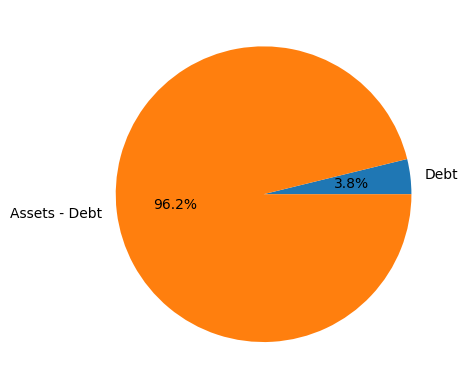

In [214]:
plt.pie(lls, labels=labels, autopct='%.1f%%')
plt.show() # 실질적으로 Debt 비율만 보면 된다.

In [178]:
cc['2019_x'][0]

0    25547017.0
0           NaN
Name: 2019_x, dtype: float64

In [179]:
[cc['2019_x'][4092],cc['2019_y'][4092]]

[4092    79528000.0
 4092           NaN
 Name: 2019_x, dtype: float64,
 4092           NaN
 4092    10507000.0
 Name: 2019_y, dtype: float64]

In [131]:
debt_to_asset_2020 = xy['2020_x'] /xy['2020_y']

In [132]:
debt_to_asset_2021 = xy['2021_x'] /xy['2021_y']

In [133]:
debt_to_asset_2022 = xy['2022_x'] /xy['2022_y']

In [130]:
#debt_to_asset_2023 = xy['2023_x'] /xy['2023_y']

In [80]:
ff = total_debt['2022'][0]

In [81]:
jj = total_asset['2022'][0]

In [70]:
# test_debt_to_ratio = total_debt['2022'] / total_asset['2022']

In [94]:
dd = round(ff /jj,4)

In [95]:
dd

0.0768

In [215]:
# for ff in total_debt['2022']:
#     for jj in total_asset['2022']:
#         print(round(ff/jj,4))

In [64]:
# test_ratio = (total_debt / total_asset)

In [22]:
result_df_test_cf_final['Unnamed: 0'][:57] # 54 extracting investing data to make graph

0                                     Free Cash Flow
1                        Repurchase Of Capital Stock
2                                  Repayment Of Debt
3                                   Issuance Of Debt
4                          Issuance Of Capital Stock
5                                Capital Expenditure
6                    Interest Paid Supplemental Data
7                  Income Tax Paid Supplemental Data
8                                  End Cash Position
9                            Beginning Cash Position
10                                   Changes In Cash
11                               Financing Cash Flow
12    Cash Flow From Continuing Financing Activities
13                       Net Other Financing Charges
14                               Cash Dividends Paid
15                        Common Stock Dividend Paid
16                         Net Common Stock Issuance
17                             Common Stock Payments
18                             Common Stock Is

In [216]:
cfdf = pd.DataFrame(result_df_test_cf_final)
col_cf = df.set_index(keys=['Unnamed: 0'])

In [224]:
col_cf

,2019,2020,2021,2022,2023,Company
Unnamed: 0,,,,,,
Treasury Shares Number,585358.0,585358.0,585358.0,585358.0,NaN,AACG
Ordinary Shares Number,62357078.0,62701002.0,62753840.0,63244340.0,NaN,AACG
Share Issued,62942436.0,63286360.0,63339198.0,63829698.0,NaN,AACG
Total Debt,25547017.0,47778952.0,40717267.0,36449192.0,NaN,AACG
Tangible Book Value,-35838901.0,-106936211.0,-100338649.0,-129309603.0,NaN,AACG
...,...,...,...,...,...,...
Receivables,5833000.0,13837000.0,28632000.0,35063000.0,NaN,ZYXI
Accounts Receivable,5833000.0,13837000.0,28632000.0,35063000.0,NaN,ZYXI
Cash Cash Equivalents And Short Term Investments,14040000.0,39173000.0,42612000.0,20144000.0,NaN,ZYXI


In [309]:
col_cf[col_cf.index.str.contains('Invest')].index.drop_duplicates() # 12 개 항목 추출 후 투자 리스트 데이터만 보여주기 (리스트 or 그래프 차트)

Index(['Invested Capital', 'Investments And Advances',
       'Cash Cash Equivalents And Short Term Investments',
       'Other Short Term Investments', 'Long Term Equity Investment',
       'Investments In Other Ventures Under Equity Method',
       'Other Investments', 'Investmentin Financial Assets',
       'Investmentsin Subsidiariesat Cost', 'Investmentsin Associatesat Cost',
       'Investment Properties', 'Investmentsin Joint Venturesat Cost'],
      dtype='object', name='Unnamed: 0')

In [24]:
result_df_test_fs_final['Unnamed: 0'][:40] # 38 asset optimization and regression for backcruptcy

0                           Tax Effect Of Unusual Items
1                                    Tax Rate For Calcs
2                                     Normalized EBITDA
3     Net Income From Continuing Operation Net Minor...
4                               Reconciled Depreciation
5                            Reconciled Cost Of Revenue
6                                                  EBIT
7                                   Net Interest Income
8                                      Interest Expense
9                                       Interest Income
10                                    Normalized Income
11    Net Income From Continuing And Discontinued Op...
12                                       Total Expenses
13                   Total Operating Income As Reported
14                               Diluted Average Shares
15                                 Basic Average Shares
16                                          Diluted EPS
17                                            Ba

In [275]:
fsdf = pd.DataFrame(result_df_test_fs_final)
col_fs = fsdf.set_index(keys=['Unnamed: 0'])

In [282]:
col_cf.index.str.contains('Revenue')

array([False, False, False, ..., False, False, False])

In [291]:
col_fs.loc['Interest Expense']

,2022,2021,2020,2019,company,2023
Unnamed: 0,,,,,,
Interest Expense,2.931000e+09,2.645000e+09,2.873000e+09,3.576000e+09,AAPL,NaN
Interest Expense,2.063000e+09,2.346000e+09,2.591000e+09,NaN,MSFT,1.968000e+09
Interest Expense,3.570000e+08,3.460000e+08,1.350000e+08,1.000000e+08,GOOGL,NaN
Interest Expense,2.367000e+09,1.809000e+09,1.647000e+09,1.600000e+09,AMZN,NaN
Interest Expense,2.360000e+08,1.840000e+08,5.200000e+07,NaN,NVDA,2.620000e+08
...,...,...,...,...,...,...
Interest Expense,NaN,NaN,NaN,NaN,NWTNW,NaN
Interest Expense,NaN,NaN,7.900000e+04,NaN,SMXWW,NaN
Interest Expense,5.940760e+08,2.951690e+08,7.010300e+07,NaN,LVROW,NaN


In [302]:
opin = col_fs.loc['Operating Income'] # Operating Income / Interest Expense

In [303]:
inex = col_fs.loc['Interest Expense']

In [307]:
cc = pd.DataFrame(opin['2019'])
dd = pd.DataFrame(inex['2019'])
debtpay = [ cc['2019'][0] /dd['2019'][0] ]

In [308]:
debtpay # 이자보상비율

[17.87751677852349]

In [250]:
col_fs[col_fs.index.str.contains('Interest Expense')]

,2019,2020,2021,2022,2023,Company
Unnamed: 0,,,,,,
